In [64]:

import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [65]:
img = cv2.imread("C:/Users/Dell/Desktop/Sport_person_image_classification/model/Dataset/Rohit_chaudhary/IMG_4384.JPG")
img.shape

(4032, 3024, 3)

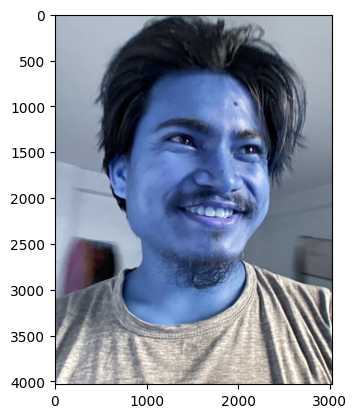

In [66]:
plt.imshow(img)
plt.show()

In [67]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(4032, 3024)

In [68]:
gray

array([[184, 186, 184, ..., 189, 189, 188],
       [183, 186, 185, ..., 189, 189, 188],
       [183, 186, 186, ..., 190, 189, 189],
       ...,
       [189, 191, 190, ..., 204, 206, 219],
       [188, 189, 186, ..., 202, 203, 216],
       [193, 193, 190, ..., 200, 201, 213]], dtype=uint8)

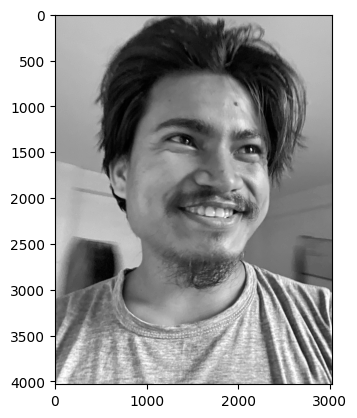

In [69]:
plt.imshow(gray, cmap="gray")
plt.show()

In [70]:
face_cascade = cv2.CascadeClassifier('C:/Users/Dell/Desktop/Sport_person_image_classification/model/opencv/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier("C:/Users/Dell/Desktop/Sport_person_image_classification/model/opencv/haarcascade_eye.xml")

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 820,  720, 1790, 1790]])

In [71]:
(x,y,w,h) = faces[0]
x,y,w,h

(820, 720, 1790, 1790)

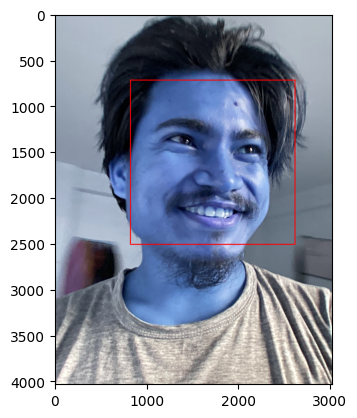

In [72]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),10)
plt.imshow(face_img)

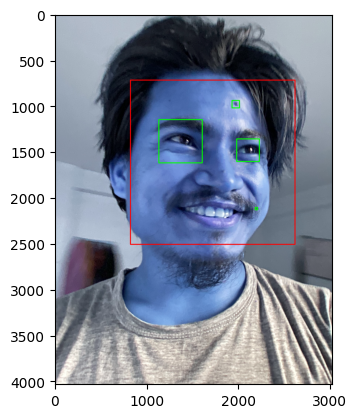

In [73]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),10)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

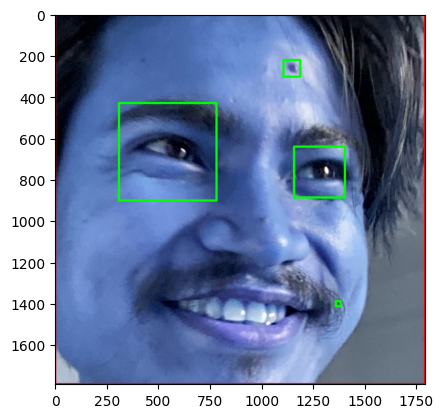

In [74]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [75]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

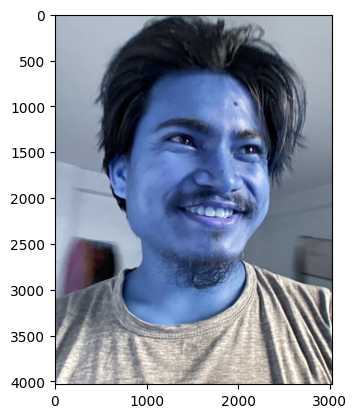

In [76]:
original_image = cv2.imread('C:/Users/Dell/Desktop/Sport_person_image_classification/model/Dataset/Rohit_chaudhary/IMG_4384.JPG')
plt.imshow(original_image)

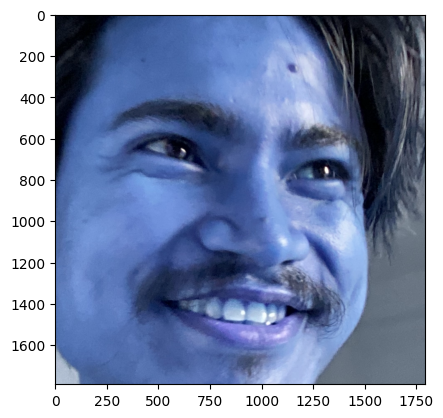

In [77]:
cropped_image = get_cropped_image_if_2_eyes('C:/Users/Dell/Desktop/Sport_person_image_classification/model/Dataset/Rohit_chaudhary/IMG_4384.JPG')
plt.imshow(cropped_image)

In [78]:
path_to_data = "C:/Users/Dell/Desktop/Sport_person_image_classification/model/Dataset/"
path_to_cr_data = "C:/Users/Dell/Desktop/Sport_person_image_classification/model/Dataset/cropped/"

In [79]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [80]:
img_dirs

['C:/Users/Dell/Desktop/Sport_person_image_classification/model/Dataset/cropped',
 'C:/Users/Dell/Desktop/Sport_person_image_classification/model/Dataset/Paras_khadka',
 'C:/Users/Dell/Desktop/Sport_person_image_classification/model/Dataset/Rohit_chaudhary',
 'C:/Users/Dell/Desktop/Sport_person_image_classification/model/Dataset/Rohit_poudel',
 'C:/Users/Dell/Desktop/Sport_person_image_classification/model/Dataset/Samba',
 'C:/Users/Dell/Desktop/Sport_person_image_classification/model/Dataset/Sandeep_lamichhane',
 'C:/Users/Dell/Desktop/Sport_person_image_classification/model/Dataset/Sompal_kami']

In [81]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [82]:
cropped_image_dirs = []
celebrity_file_names_dict = {}


for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    


cropped
Paras_khadka
Generating cropped images in folder:  C:/Users/Dell/Desktop/Sport_person_image_classification/model/Dataset/cropped/Paras_khadka
Rohit_chaudhary
Generating cropped images in folder:  C:/Users/Dell/Desktop/Sport_person_image_classification/model/Dataset/cropped/Rohit_chaudhary
Rohit_poudel
Generating cropped images in folder:  C:/Users/Dell/Desktop/Sport_person_image_classification/model/Dataset/cropped/Rohit_poudel
Samba
Generating cropped images in folder:  C:/Users/Dell/Desktop/Sport_person_image_classification/model/Dataset/cropped/Samba
Sandeep_lamichhane
Generating cropped images in folder:  C:/Users/Dell/Desktop/Sport_person_image_classification/model/Dataset/cropped/Sandeep_lamichhane
Sompal_kami
Generating cropped images in folder:  C:/Users/Dell/Desktop/Sport_person_image_classification/model/Dataset/cropped/Sompal_kami


# Feature Engineering

In [83]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img

    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )

    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [84]:
cropped_img = np.array(roi_color)
cropped_img.shape

(75, 75, 3)

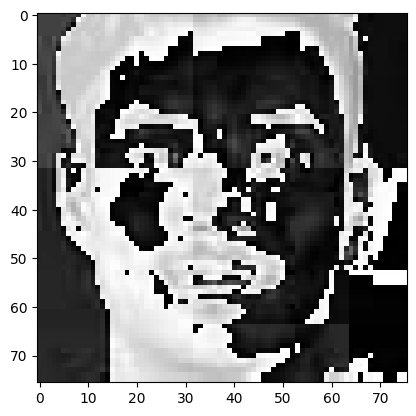

In [85]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [86]:
celebrity_file_names_dict 

{'cropped': [],
 'Paras_khadka': ['C:/Users/Dell/Desktop/Sport_person_image_classification/model/Dataset/cropped/Paras_khadka/Paras_khadka1.png',
  'C:/Users/Dell/Desktop/Sport_person_image_classification/model/Dataset/cropped/Paras_khadka/Paras_khadka2.png',
  'C:/Users/Dell/Desktop/Sport_person_image_classification/model/Dataset/cropped/Paras_khadka/Paras_khadka3.png',
  'C:/Users/Dell/Desktop/Sport_person_image_classification/model/Dataset/cropped/Paras_khadka/Paras_khadka4.png',
  'C:/Users/Dell/Desktop/Sport_person_image_classification/model/Dataset/cropped/Paras_khadka/Paras_khadka5.png',
  'C:/Users/Dell/Desktop/Sport_person_image_classification/model/Dataset/cropped/Paras_khadka/Paras_khadka6.png',
  'C:/Users/Dell/Desktop/Sport_person_image_classification/model/Dataset/cropped/Paras_khadka/Paras_khadka7.png',
  'C:/Users/Dell/Desktop/Sport_person_image_classification/model/Dataset/cropped/Paras_khadka/Paras_khadka8.png',
  'C:/Users/Dell/Desktop/Sport_person_image_classificati

In [87]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'cropped': 0,
 'Paras_khadka': 1,
 'Rohit_chaudhary': 2,
 'Rohit_poudel': 3,
 'Samba': 4,
 'Sandeep_lamichhane': 5,
 'Sompal_kami': 6}

In [88]:

X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])     

In [89]:
import cv2
import numpy as np
import pandas as pd
import pywt

# Function to perform wavelet transform
def w2d(img, mode='haar', level=1):
    imArray = img
    imArray = cv2.cvtColor(imArray,cv2.COLOR_BGR2GRAY)
    imArray =  np.float32(imArray)   
    imArray /= 255;
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

# Placeholder for data
X, y = [], []

# Assuming you have the necessary data structures
# celebrity_file_names_dict = {...}
# class_dict = {...}

for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        
        # Flatten images
        scalled_raw_img_flatten = scalled_raw_img.flatten()
        scalled_img_har_flatten = scalled_img_har.flatten()
        
        # Combine them
        combined_img = np.hstack((scalled_raw_img_flatten, scalled_img_har_flatten))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

# Create a DataFrame if necessary
df = pd.DataFrame(X)
df['label'] = y

print(df.head())


     0    1    2    3    4    5    6    7    8   9  ...  4087  4088  4089  \
0  120  122  129   42   42   49   47   49   61  43  ...    34    14    87   
1  255  253  254  237  234  235   47   43   43  26  ...    39    11    29   
2   79   44   11   80   41   11   77   43   18  47  ...   222   199   189   
3  111  111  111   89   84   85   84   78   81  87  ...    72    61    56   
4  255  255  255  250  250  250  235  235  235  44  ...   226   103    46   

   4090  4091  4092  4093  4094  4095  label  
0    38    60    16   226   195   246      1  
1    49   145   169   222   109    33      1  
2   197   216   224   232   233     0      1  
3    60    60    65    59    64    63      1  
4    68   126   186    64     1    88      1  

[5 rows x 4097 columns]


In [90]:
df.shape

(119, 4097)

In [91]:
X[1].shape

(4096,)

In [92]:
len(X[0])

4096

In [93]:
y[0]

1

In [94]:

X = np.array(X).reshape(len(X),4096).astype(float)
X.shape


(119, 4096)

# Training Model

In [95]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [97]:

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)


0.7

In [98]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           1       1.00      0.80      0.89         5
           2       0.93      0.93      0.93        15
           3       0.20      0.67      0.31         3
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1
           6       1.00      0.33      0.50         3

    accuracy                           0.70        30
   macro avg       0.52      0.46      0.44        30
weighted avg       0.75      0.70      0.70        30



c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [99]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [100]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [101]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df


c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


,model,best_score,best_params
0,svm,0.684967,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.605229,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.628105,{'logisticregression__C': 1}


In [102]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [103]:
best_estimators['svm'].score(X_test,y_test)

0.7333333333333333

In [104]:
best_estimators['random_forest'].score(X_test,y_test)

0.6

In [105]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.6333333333333333

In [106]:
best_clf = best_estimators['svm']

In [107]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 4,  0,  1,  0,  0,  0],
       [ 0, 13,  1,  0,  0,  1],
       [ 0,  0,  3,  0,  0,  0],
       [ 0,  0,  2,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1],
       [ 0,  0,  1,  0,  0,  2]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

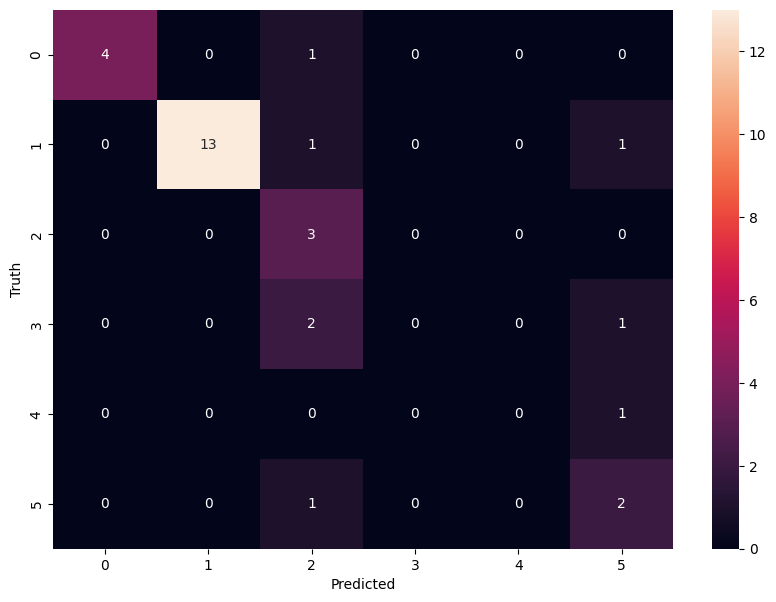

In [108]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [109]:

class_dict

{'cropped': 0,
 'Paras_khadka': 1,
 'Rohit_chaudhary': 2,
 'Rohit_poudel': 3,
 'Samba': 4,
 'Sandeep_lamichhane': 5,
 'Sompal_kami': 6}

In [110]:

import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [111]:

import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))